In [1]:
import nltk

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.getcwd()

'/Users/Edureka'

In [3]:
os.listdir()

['glass.csv',
 'F-ratio table 2005.pdf',
 '.Rhistory',
 'association_rules.xlsx',
 'Computer_Data2.csv',
 'hour_transaction.csv',
 'adult.data',
 'u.item',
 'nba_logreg.csv',
 'LSTM_figure4_v3a.png',
 'corona.csv',
 'TataGlobal_train.csv',
 'Edureka_working_session.R',
 'AirPassengers.csv',
 'Degrees of freedom.docx',
 'BX-Book-Ratings.csv',
 'Python StockPrice Demo 1.ipynb',
 'Untitled1.ipynb',
 'Python KMeans Demo.ipynb',
 'creditdata.csv',
 'Doctor_Appointment_Noshow.csv',
 '.DS_Store',
 'LSTM_Air_Passengers.ipynb',
 '.httr-oauth',
 'Python Association Rule Mining Demo.ipynb',
 'Python Demo Logistic Regression.ipynb',
 'Tensorflow demo1.ipynb',
 'Python Demo LSTM NLP.ipynb',
 'emp_data.csv',
 'Python Demo NLP_sentiment_analysis.ipynb',
 'Python StockPrice Demo.ipynb',
 'divorce.csv',
 'recommender system_surprise library-Copy1.ipynb',
 'Python',
 'Untitled3.ipynb',
 'classification_trial.R',
 'covid_19_clean_complete.csv',
 'Untitled.ipynb',
 'LogisticRegression.R',
 'Air Passengers

In [4]:
tweets=pd.read_csv('./Python/demonetization-tweets_data.csv',encoding='ISO-8859-1')

In [5]:
tweets.sample(5)

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,statusSource,screenName,retweetCount,isRetweet,retweeted
6600,"RT @mkatju: people have got stunts like, Swach...",False,0,NaN,4/14/2017 8:59,False,NaN,"<a href=""http://twitter.com/download/android"" ...",akashgoyalbrt,60,True,False
2986,RT @tweepul: Even if you're 100% white money &...,False,0,NaN,11/22/2016 16:55,False,NaN,"<a href=""http://twitter.com/download/android"" ...",Sunna5V,48,True,False
5495,RT @steve_hanke: ATMs across #India running ou...,False,0,NaN,4/16/2017 16:43,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",missy77450324,197,True,False
5372,RT @URautelaForever: Dear @evanspiegel \r\nInd...,False,0,NaN,4/16/2017 20:37,False,NaN,"<a href=""http://twitter.com/download/android"" ...",somu_1988,1333,True,False
520,RT @harshkkapoor: #DeMonetization survey resul...,False,0,NaN,11/23/2016 15:08,False,NaN,"<a href=""http://twitter.com/download/android"" ...",bhawana_pal,59,True,False


In [6]:
tweets.text[2]

'RT @satishacharya: Reddy Wedding! @mail_today cartoon #demonetization #ReddyWedding https://t.co/u7gLNrq31F'

In [7]:
import re,string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [8]:
# I am going to the garden today with my cousins and my relatives who are in hyderabad

In [9]:
def clean_text(tweets):
    tweets=word_tokenize(tweets)
    tweets=tweets[4:]
    tweets=" ".join(tweets)
    tweets=re.sub('https','',tweets)
    tweets=[c for c in tweets if c not in string.punctuation]
    tweets="".join(tweets)
    tweets=[word for word in tweets.split() if word.lower() not in stopwords.words('english')]
    return " ".join(tweets)

In [10]:
tweets['cleaned_text']=tweets['text'].apply(clean_text)

In [11]:
tweets['text'].head()

0    RT @rssurjewala: Critical question: Was PayTM ...
1    RT @roshankar: Former FinSec, RBI Dy Governor,...
2    RT @satishacharya: Reddy Wedding! @mail_today ...
3    RT @gauravcsawant: Rs 40 lakh looted from a ba...
4    RT @sumitbhati2002: Many opposition leaders ar...
Name: text, dtype: object

In [12]:
tweets['cleaned_text'].head()

0    Critical question PayTM informed Demonetizatio...
1    Former FinSec RBI Dy Governor CBDT Chair Harva...
2    Reddy Wedding mailtoday cartoon demonetization...
3    Rs 40 lakh looted bank Kishtwar J amp K Third ...
4    Many opposition leaders narendramodi Demonetiz...
Name: cleaned_text, dtype: object

In [13]:
tweets['cleaned_text'][6]

'28 ed U00A0 U00BD ed U00B8 U0082 protesting demonetization different party leaders'

In [14]:
import re
features=tweets['cleaned_text']
processed_features=[]
for sentence in range(0,len(features)):
    # Remove special characters
    processed_feature=re.sub(r'\W', ' ',str(features[sentence]))
    
    #Remove for single characters
    processed_feature=re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    
    #Remove single character at the starting of the sentence
    processed_feature=re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)
    
    #Remove Mulitple spaces and replace with single space
    processed_feature=re.sub(r'\s+', ' ', processed_feature,flags=re.I)
    
    #Remove byte character b
    processed_feature=re.sub(r'^b\s+', '', processed_feature)
    
    #Convert everything to lowercase
    processed_feature=processed_feature.lower()
    
    processed_features.append(processed_feature)
                             

In [15]:
processed_features[:6]

['critical question paytm informed demonetization edict pm clearly fishy requires full disclosure amp',
 'former finsec rbi dy governor cbdt chair harvard professor lambaste demonetization aam aadmi listen th',
 'reddy wedding mailtoday cartoon demonetization reddywedding tcou7glnrq31f',
 'rs 40 lakh looted bank kishtwar amp third incident since demonetization terrorists',
 'many opposition leaders narendramodi demonetization respect decision support oppositio',
 'narendramodi demonetization respect decision support opposition bcoz party']

In [16]:
tweets['processed_text']=processed_features

In [17]:
tweets.sample(4)

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,statusSource,screenName,retweetCount,isRetweet,retweeted,cleaned_text,processed_text
4030,After almost 6 months can this govt explains t...,False,0,NaN,4/21/2017 14:54,False,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Ironmangaurav,0,False,False,govt explains benefits demonetization waiting ...,govt explains benefits demonetization waiting ...
4435,How India became Bill Gates' guinea pig: A con...,False,0,NaN,4/20/2017 4:25,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",DuncanGalbrait1,0,False,False,Gates guinea pig conspiracy recounted main act...,gates guinea pig conspiracy recounted main act...
217,RT @DrGPradhan: 8\r\n\r\nThis tweet of @minima...,False,0,NaN,11/23/2016 17:03,False,NaN,"<a href=""http://twitter.com/download/android"" ...",rajendra_hash,76,True,False,8 tweet minimathur BIBI explains prob demoneti...,8 tweet minimathur bibi explains prob demoneti...
1371,RT @jenaanindya: 200 MPs from opposition parti...,False,0,NaN,11/23/2016 9:20,False,NaN,"<a href=""http://twitter.com/download/android"" ...",varibar02_dr,2,True,False,200 MPs opposition parties forming chain Parli...,200 mps opposition parties forming chain parli...


In [18]:
from textblob import TextBlob

In [19]:
def generate_polarity(text):
    sentiment=TextBlob(text).sentiment
    return sentiment

In [20]:
sentiment=tweets['processed_text'].apply(generate_polarity)
sentiment=sentiment.to_frame()

In [21]:
sentiment.head()
sentiment.processed_text[0]

Sentiment(polarity=0.15, subjectivity=0.5777777777777778)

In [22]:
sentiment['polarity']=sentiment['processed_text'].apply(lambda x: x[0])

In [23]:
sentiment['subjectivity']=sentiment['processed_text'].apply(lambda x:x[1])

In [24]:
sentiment.head()

,processed_text,polarity,subjectivity
0,"(0.15, 0.5777777777777778)",0.15,0.577778
1,"(0.0, 0.0)",0.00,0.000000
2,"(0.0, 0.0)",0.00,0.000000
3,"(0.0, 0.0)",0.00,0.000000
4,"(0.5, 0.5)",0.50,0.500000


In [25]:
tweets['polarity']=sentiment['polarity']
tweets['subjectivity']=sentiment['subjectivity']

In [26]:
tweets.head()

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,statusSource,screenName,retweetCount,isRetweet,retweeted,cleaned_text,processed_text,polarity,subjectivity
0,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,11/23/2016 18:40,False,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False,Critical question PayTM informed Demonetizatio...,critical question paytm informed demonetizatio...,0.15,0.577778
1,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,11/23/2016 18:40,False,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False,Former FinSec RBI Dy Governor CBDT Chair Harva...,former finsec rbi dy governor cbdt chair harva...,0.00,0.000000
2,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,11/23/2016 18:39,False,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False,Reddy Wedding mailtoday cartoon demonetization...,reddy wedding mailtoday cartoon demonetization...,0.00,0.000000
3,RT @gauravcsawant: Rs 40 lakh looted from a ba...,False,0,NaN,11/23/2016 18:38,False,NaN,"<a href=""http://twitter.com/download/android"" ...",bhodia1,637,True,False,Rs 40 lakh looted bank Kishtwar J amp K Third ...,rs 40 lakh looted bank kishtwar amp third inci...,0.00,0.000000
4,RT @sumitbhati2002: Many opposition leaders ar...,False,0,NaN,11/23/2016 18:38,False,NaN,"<a href=""http://twitter.com/download/android"" ...",sumitbhati2002,1,True,False,Many opposition leaders narendramodi Demonetiz...,many opposition leaders narendramodi demonetiz...,0.50,0.500000


In [27]:
tweets['polarity_encoded']=['positive' if x>0 else 'negative' if x<0 else 'netural' for x in tweets['polarity']]

In [28]:
tweets['polarity_encoded'].unique()

array(['positive', 'netural', 'negative'], dtype=object)

In [29]:
tweets['polarity_encoded'].value_counts()

netural     3724
positive    2645
negative    1101
Name: polarity_encoded, dtype: int64

In [30]:
df=tweets[['processed_text','polarity_encoded']]

In [31]:
df.sample(6)

,processed_text,polarity_encoded
2443,bypolls decide demonetization modi results byp...,netural
790,rs 40 lakh looted bank kishtwar amp third inci...,netural
4520,demonetization scam adaniambani scam 11k arab ...,positive
6943,bypolls result today prove modi wave whether d...,positive
746,huge support pm narendramodi demonetization mo...,positive
6172,dear evanspiegel india rich pm narendra modi i...,positive


In [32]:
df.shape

(7470, 2)

In [33]:
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer
from sklearn.model_selection import train_test_split

In [34]:
def tokenize(text):
    tk=TweetTokenizer()
    return tk.tokenize(text)

vectorizer=CountVectorizer(analyzer='word',tokenizer=tokenize,lowercase=True,ngram_range=(1,1))

In [35]:
features=df['processed_text'].values
target=df['polarity_encoded'].values

In [36]:
target

array(['positive', 'netural', 'netural', ..., 'positive', 'negative',
       'netural'], dtype=object)

In [37]:
f=vectorizer.fit_transform(features)
f=f.toarray()

In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
t=le.fit_transform(target)

In [39]:
xtrain,xtest,ytrain,ytest=train_test_split(f,t,test_size=0.3,random_state=980)

In [40]:
xtrain.shape,ytrain.shape

((5229, 8919), (5229,))

In [41]:
xtrain=xtrain.reshape(xtrain.shape[0],xtrain.shape[1],1)
xtest=xtest.reshape(xtest.shape[0],xtest.shape[1],1)

In [42]:
xtrain.shape,ytrain.shape,xtest.shape

((5229, 8919, 1), (5229,), (2241, 8919, 1))

In [46]:
import keras
from keras.layers import Dense, LSTM,Dropout
from keras.models import Sequential

In [47]:
model=Sequential()
model.add(LSTM(1,input_shape=(8919,1)))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

In [51]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=(['accuracy']))

In [52]:
model.fit(xtrain,ytrain,epochs=3,batch_size=32,verbose=1,validation_data=(xtest,ytest))

Train on 5229 samples, validate on 2241 samples
Epoch 1/3
5229/5229 [==============================] - 1462s 280ms/step - loss: 0.5571 - accuracy: 0.4926 - val_loss: 0.3842 - val_accuracy: 0.5056
Epoch 2/3
5229/5229 [==============================] - 1268s 243ms/step - loss: 0.1098 - accuracy: 0.4955 - val_loss: -0.1548 - val_accuracy: 0.5056
Epoch 3/3
5229/5229 [==============================] - 2077s 397ms/step - loss: -0.2288 - accuracy: 0.4955 - val_loss: -0.3267 - val_accuracy: 0.5056


In [53]:
predict=model.predict(xtest)

In [54]:
type(predict),type(ytest),predict.shape,ytest.shape

(numpy.ndarray, numpy.ndarray, (2241, 1), (2241,))

In [55]:
predict=predict.reshape(-1,)

In [56]:
prediction=pd.DataFrame({'Actual':ytest,'Predicted':predict})

In [57]:
prediction.sample(5)

,Actual,Predicted
121,2,0.901409
1418,1,0.901409
2120,2,0.901409
1989,1,0.901409
822,1,0.901409


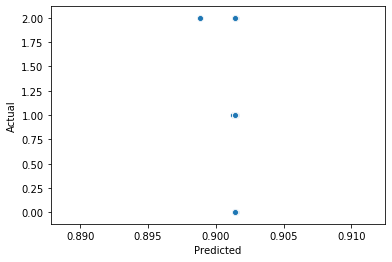

In [58]:
import seaborn as sns
sns.scatterplot('Predicted','Actual',data=prediction)